<h1>Decision Tree</h1>

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df=pd.read_csv('SosyalMedyaReklamKampanyasi.csv')

df.info()
df.describe()

df.isnull().values.any()

x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values
 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.40,random_state=0) #verileri train ve test olarak ayırıyoruz.40%si test ,60%i eğitim

from sklearn.preprocessing import StandardScaler #ölçekleme için gerekli kütüphane

sc=StandardScaler() #uyumsuz veriler olunca ölçekleme yaparız.

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier #karar ağacı için gerekli kütüphane

det_tree=DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=0)

det_tree.fit(X_train,Y_train)

pred_val_y=det_tree.predict(X_test)

print(y.sum(),"\n") #gerçek alım toplamı
print(pred_val_y.sum()) #tahmin alım toplamı




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   KullaniciID  400 non-null    int64 
 1   Cinsiyet     400 non-null    object
 2   Yas          400 non-null    int64 
 3   TahminiMaas  400 non-null    int64 
 4   SatinAldiMi  400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
143 

56


In [50]:
from sklearn.metrics import confusion_matrix #hata matrisi için gerekli kütüphane

cm=confusion_matrix(Y_test,pred_val_y) #instance
cm #baktığımızda 15 adet sınıflandırma hatası görülmektedir.

array([[95,  6],
       [ 9, 50]], dtype=int64)

### <h1>Iris Dataset</h1>


In [110]:
import pandas as pd
import numpy as np


dataset=pd.read_csv('Iris.csv')
dataset

x_set=dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #verileri bölüyoruz
y=dataset['Species']

from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()

y=le.fit_transform(y) # Sözcükler , temsili sayılara çevrilir , Setosa - 0, Versicolor - 1 , Virginica - 2.

x_set.info()
y_set.isnull().values.sum()

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x_set,y,test_size=0.25,random_state=0) #%25i test,75%i ise eğitim verileri



from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
dc.fit(X_train,Y_train)

pred_val=dc.predict(X_test)

print(pred_val.sum(),'\n')
print(Y_test.sum())
print('\n')
print(pred_val[0:100]) # Karşılaştırmak için bastırıyoruz.
print(Y_test[0:100])

# bakıldığı zaman oldukça iyi bir tahmin yapıldığı görülüyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
35 

34


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


Test Doğruluk Hassasiyeti: 0.9736842105263158
Eğitim Doğruluk Hassasiyeti: 1.0


C:\Users\Mehmet.Arikan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


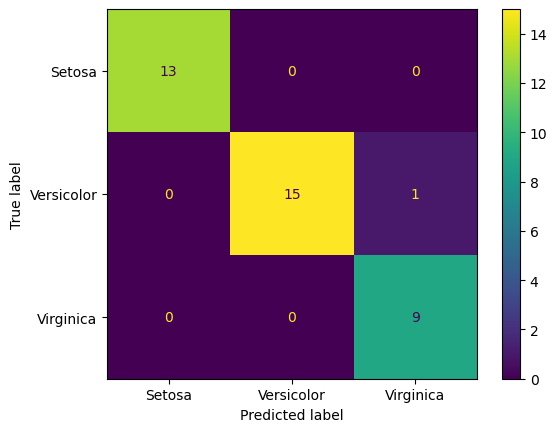

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix # hata matrisini kullanabilmek için kütüphane dahil edilir.


print('Test Doğruluk Hassasiyeti:' ,dc.score(X_test,Y_test)) #test ve eğitim verilerinin doğruluğunu gösterir.
print('Eğitim Doğruluk Hassasiyeti:' ,dc.score(X_train,Y_train))

cm=confusion_matrix(Y_test,pred_val) # tahmindeki hatanın ne kadar olduğunu gösterir.
cm

plot_confusion_matrix(dc,X_test,Y_test,display_labels=['Setosa','Versicolor','Virginica']) # hata matrisinin görselde gösterilmesi

[Text(0.4, 0.9, 'PetalWidthCm <= 0.8\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'PetalLengthCm <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'PetalWidthCm <= 1.65\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'SepalWidthCm <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'PetalWidthCm <= 1.75\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'PetalWidthCm <= 1.65\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 35\nval

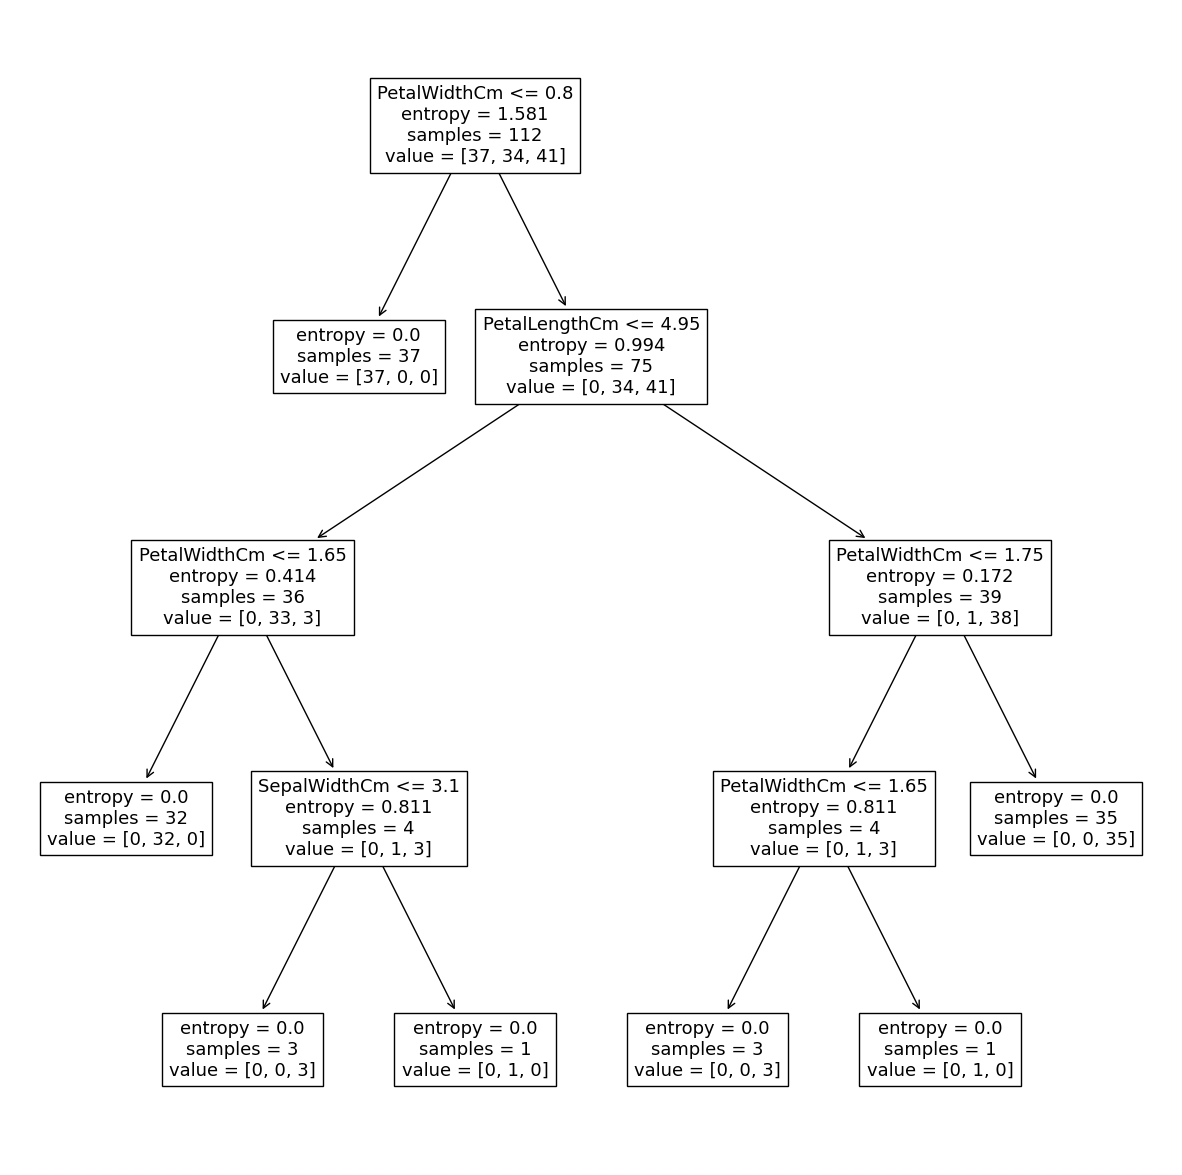

In [113]:
import matplotlib.pyplot as plt

from sklearn import tree
figuree,ax=plt.subplots(figsize=(15,15))
tree.plot_tree(dc,ax=ax,feature_names=["SepalLengthCm", "SepalWidthCm","PetalLengthCm","PetalWidthCm"])


# ağaç şeklinde bizlere görsel bir çıktı verecektir.
# entropi(gini değeri) sıfıra yakınlaştıkça tahmin değerimiz de o kadar iyi olacaktır.